Ordinary encoding /
One hot encoding  /
Regression:
    -VARIANCE THRESHOLD/
    -Collinearity/
Metrics:/
    -KBest /
    - SELECT FROM MODEL/
KNN /
DecisionTreeRegression /
r_2/

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score


import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

from sklearn.model_selection import GridSearchCV

In [ ]:
#import seaborn as sns     #how to import the data from sns
#iamonds = sns.load_dataset('diamonds')

Data_Set 

In [280]:
url = "https://drive.google.com/file/d/1idsy5wqE1fhiRY7dAiKgq-eKyTzoeW01/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Drop the useless feature 'Id'

In [63]:
#data.drop(columns=['Id'])
#or
#X = X.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.isna().sum().head(70)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
Length: 70, dtype: int64

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


X and y labels

In [281]:
X = data                 #drop if need a few columns are't usefull
y = X.pop("SalePrice")

In [163]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


Spliting data

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [283]:
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()

In [166]:
X_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# FEATURE SELECTING AND ENGINEERING  

+ VARIANCE THRESHOLD +

Features with low variance carry limited information, and with this transformer, we can eliminate those features by setting a threshold.
The data must e scaled

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1446 to 1389
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1095 non-null   int64  
 1   MSSubClass     1095 non-null   int64  
 2   MSZoning       1095 non-null   object 
 3   LotFrontage    921 non-null    float64
 4   LotArea        1095 non-null   int64  
 5   Street         1095 non-null   object 
 6   Alley          72 non-null     object 
 7   LotShape       1095 non-null   object 
 8   LandContour    1095 non-null   object 
 9   Utilities      1095 non-null   object 
 10  LotConfig      1095 non-null   object 
 11  LandSlope      1095 non-null   object 
 12  Neighborhood   1095 non-null   object 
 13  Condition1     1095 non-null   object 
 14  Condition2     1095 non-null   object 
 15  BldgType       1095 non-null   object 
 16  HouseStyle     1095 non-null   object 
 17  OverallQual    1095 non-null   int64  
 18  Overa

In [284]:
X_num_feat = X_train.select_dtypes(include="number").copy()

In [255]:
# Initialize the scaler.
my_scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler to X_train and transform the values.
X_train_scaled = my_scaler.fit_transform(X_num_feat)

In [247]:
(
  pd.DataFrame({
  'Range': X_train_scaled.max() - X_train_scaled.min(),
  'Variance': X_train_scaled.var()})
  .sort_values(by='Variance')
)

,Range,Variance
MiscVal,1.0,0.001310
LotArea,1.0,0.002005
3SsnPorch,1.0,0.002860
PoolArea,1.0,0.003396
TotalBsmtSF,1.0,0.005433
LotFrontage,1.0,0.006375
BsmtFinSF1,1.0,0.006849
1stFlrSF,1.0,0.008284
LowQualFinSF,1.0,0.008833
GrLivArea,1.0,0.010363


In [154]:
#Now, we can proceed with applying the VarianceThreshold transformation. 
#All features with a smaller variance than the threshold will be deleted from the dataset.

#selector = VarianceThreshold(threshold=0.02)
#X_train_var = selector.fit_transform(X_train_scaled)

In [155]:
#Let's check how many features were dropped:
#print("shape before:", X_train_scaled.shape)
#print("shape after:", X_train_var.shape)

shape before: (365, 36)
shape after: (365, 25)


In [146]:
#def VarianceThreshold_selector(data):
#    selector = VarianceThreshold(.02) 
#    selector.fit(X_train_scaled)
#    selector = (pd.DataFrame(selector.transform(X_train_scaled)))
#    return selector
#x = VarianceThreshold_selector(X_train_scaled)
#x

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.235294,0.571429,0.428571,0.937984,0.864407,0.000000,0.000000,0.492479,0.238917,0.640869,...,0.555556,0.333333,0.919192,0.50,0.320059,0.250871,0.131868,0.000000,0.363636,1.00
1,0.294118,0.142857,0.000000,0.155039,0.000000,0.000000,0.000000,0.610028,0.337378,0.378062,...,0.555556,0.000000,0.101010,0.75,0.574484,0.000000,0.000000,0.283019,0.363636,0.00
2,0.823529,0.571429,0.428571,0.961240,0.915254,0.000000,0.000000,0.543733,0.281848,0.407572,...,0.444444,0.000000,0.949495,0.50,0.280236,0.000000,0.109890,0.000000,0.272727,0.00
3,0.235294,0.571429,0.571429,0.914729,0.813559,0.512080,0.000000,0.074095,0.343444,0.550668,...,0.555556,0.333333,0.888889,0.50,0.429941,0.440767,0.467033,0.000000,0.454545,0.00
4,0.176471,0.285714,0.571429,0.503876,0.000000,0.304622,0.000000,0.185515,0.315446,0.283964,...,0.333333,0.333333,0.525253,0.25,0.212389,0.000000,0.000000,0.000000,0.272727,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.000000,0.142857,0.428571,0.387597,0.000000,0.000000,0.000000,0.000000,0.000000,0.400891,...,0.444444,0.000000,NaN,0.00,0.000000,0.000000,0.000000,0.000000,0.545455,1.00
361,0.235294,0.428571,0.428571,0.961240,0.915254,0.398634,0.000000,0.044568,0.229585,0.405902,...,0.555556,0.333333,0.949495,0.50,0.293510,0.174216,0.206044,0.000000,0.272727,0.50
362,0.000000,0.428571,0.428571,0.651163,0.237288,0.257353,0.000000,0.520891,0.491367,0.000000,...,0.444444,0.333333,0.545455,0.50,0.424779,0.000000,0.000000,0.000000,0.545455,0.50
363,0.235294,0.428571,0.428571,0.689922,0.322034,0.262605,0.304636,0.098050,0.335978,0.567929,...,0.666667,0.666667,0.595960,0.50,0.424779,0.487805,0.000000,0.000000,0.454545,0.50


3.1. Work with all data 
* DecisionTreeRegressor

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [181]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7580604095528735}

In [182]:
dtr_predictions = search_dtr.predict(X_test)

In [199]:
dtr_r2 = r2_score(y_true = y_test,
                  y_pred = dtr_predictions)
#lr_r2 = r2_score(y_true = y_test,
 #                y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dtr_r2]}, #, dt_r2, sgd_r2, lr_r2]},
                                    index=["dtr_all"])  #, "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,R2
dtr_all,0.774626


In [ ]:
MiscVal	1.0	0.001310
LotArea	1.0	0.002005
3SsnPorch
#PoolArea
#MiscVal

3.2. Work without the features that have a Varience less than 0.3  PoolArea	1.0	0.002740
MiscVal	1.0	0.002972

In [248]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_2 = X_num.drop(columns=['3SsnPorch','MiscVal', 'LotArea'])

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_2 = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_2.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [249]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_2,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_2 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_2.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_2.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.755761153999624}

In [ ]:
0.7594417340449644

In [250]:
dtr_2_predictions = search_dtr_2.predict(X_test)

In [251]:
dtr_2_r2 = r2_score(y_true = y_test,
                    y_pred = dtr_2_predictions)

In [252]:
comparing_models_df.loc["dtr_2"] = dtr_2_r2

In [253]:
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.724505
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.735445


In [ ]:
0.765859

In [ ]:
When I droped 2 columns there is worse output. SO I retaurn these 2 columns and drop the 'ID' column 

3.3. Data without the featire 'Id'

In [205]:
#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_2 = X_num.drop(columns=['Id'])

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_3 = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_2.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [206]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_3,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_3 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_3.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_3.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7633879587643012}

In [371]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_3,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_3 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_3.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_3.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7669898407352793}

In [207]:
dtr_3_predictions = search_dtr_3.predict(X_test)

In [208]:
dtr_3_r2 = r2_score(y_true = y_test,
                    y_pred = dtr_3_predictions)

In [209]:
comparing_models_df.loc["dtr_3"] = dtr_3_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.765859
dtr_3,0.767456


WIth 'Id' feature the R2 in DecisionTreeRegressor is better. But I will not return this feature because it doesn't make any sense.

+ KNeighborsRegressor

ALL

In [211]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7144996011352818}

In [212]:
knn_all_predictions = search_knn.predict(X_test)

In [213]:
knn_all_r2 = r2_score(y_true = y_test,
                    y_pred = knn_all_predictions)

In [214]:
comparing_models_df.loc["knn_all"] = knn_all_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.765859
dtr_3,0.767456
knn_all,0.722249


3.2. KNN

In [256]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_2,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn_2 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_2.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_2.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7157717252246875}

In [ ]:
0.7096800615283048

In [257]:
knn_2_predictions = search_knn_2.predict(X_test)

In [258]:
knn_2_r2 = r2_score(y_true = y_test,
                    y_pred = knn_2_predictions)

In [259]:
comparing_models_df.loc["knn_2"] = knn_2_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.735445


In [ ]:
knn_2	0.724505

3.3. Data without 'Id'

In [220]:
dt_pipeline = make_pipeline(full_preprocessing_3,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn_3 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_3.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_3.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7096800615283048}

In [221]:
knn_3_predictions = search_knn_3.predict(X_test)

In [222]:
knn_3_r2 = r2_score(y_true = y_test,
                    y_pred = knn_3_predictions)

In [223]:
comparing_models_df.loc["knn_3"] = knn_3_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.765859
dtr_3,0.767456
knn_all,0.722249
knn_2,0.724505
knn_3,0.724505


In [232]:
#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_11 = X_num.drop(columns=['PoolArea','MiscVal', 'Id'])

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_11 = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_11.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [451]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_11,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,5],
    #'kneighborsregressor__weights': ["uniform", "distance"],
    #'kneighborsregressor__algorithm' : ["auto", "ball_tree", "kd_tree"]
}

search_knn_4 = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_4.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_4.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7214889535325018}

In [450]:
search_knn.best_params_

{'kneighborsregressor__n_neighbors': 3}

In [229]:
knn_4_predictions = search_knn_4.predict(X_test)

In [230]:
knn_4_r2 = r2_score(y_true = y_test,
                    y_pred = knn_4_predictions)

In [231]:
comparing_models_df.loc["knn_4"] = knn_4_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.765859
dtr_3,0.767456
knn_all,0.722249
knn_2,0.724505
knn_3,0.724505
knn_4,0.724505


+ Collinearity +

Looking for a correlation between features.
Features that have a perfect (or extremely high) correlation with each other can be considered to be the same feature. We want to drop one of them. 

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_76101/3351241888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = X_train.corr().abs()


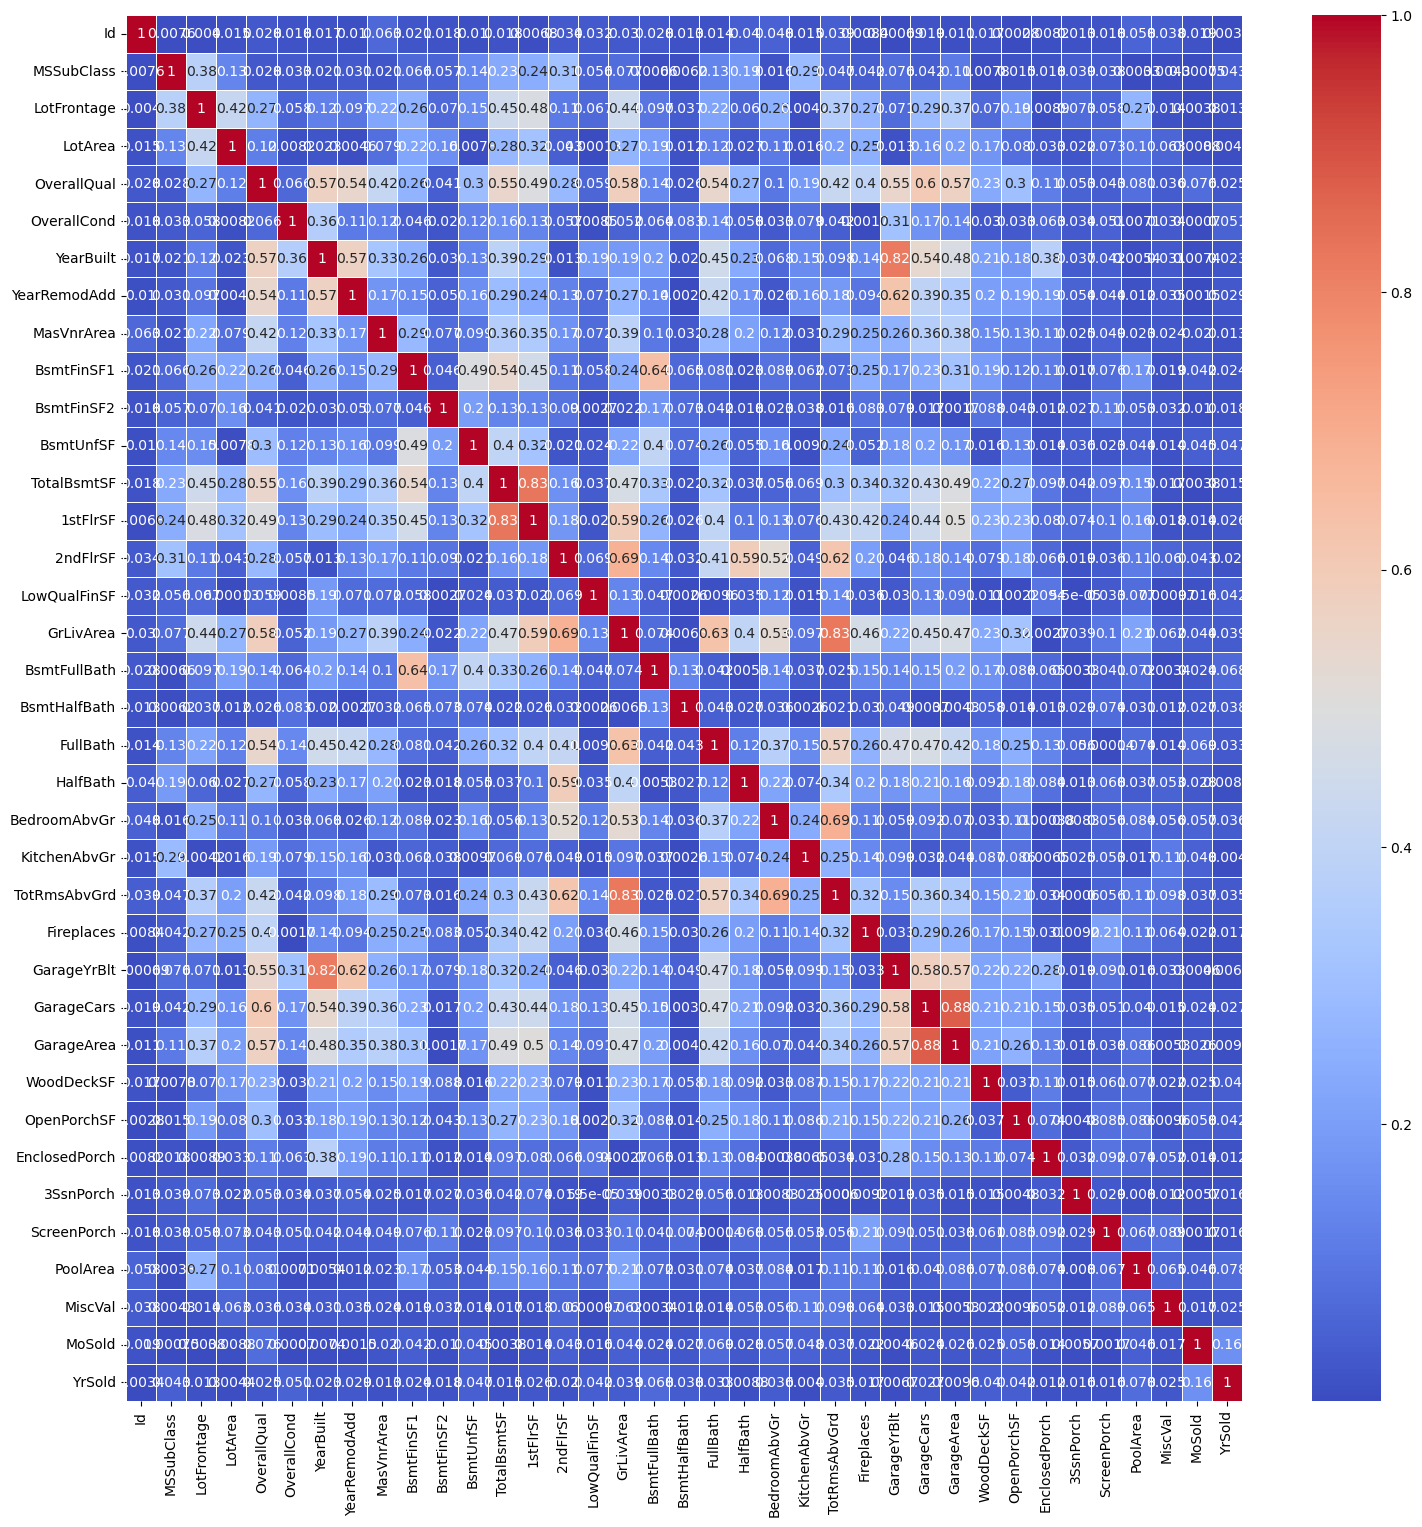

In [234]:
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = X_train.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

Try to drop these features and check the output. Let's drop the features with more that 0.8 of correlation (from y) 

In [ ]:
YearBuilt
GrLivArea
GarageCars
TotalBsmtSF

I will go with the 3 experiment (without 'Id')
DecisionTreeRegression

In [267]:
#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_c = X_num.drop(columns=['Id', 'YearBuilt','GrLivArea', 'GarageCars', 'TotalBsmtSF', '3SsnPorch','MiscVal', 'LotArea' ])  #'3SsnPorch','MiscVal', 'LotArea'

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 
                                         'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                         'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_c = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_c.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [266]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing_c,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_c = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_c.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_c.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7453694344657492}

In [ ]:
0.7453694344657492   (1)
0.7425716444543047   (2)

In [273]:
search_dtr_c.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeregressor__max_depth': 12,
 'decisiontreeregressor__min_samples_leaf': 5}

In [262]:
dtr_c_predictions = search_dtr_c.predict(X_test)

In [263]:
dtr_c_r2 = r2_score(y_true = y_test,
                    y_pred = knn_4_predictions)

In [264]:
comparing_models_df.loc["dtr_c"] = dtr_c_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.735445


In [ ]:
dtr_c	0.724505

3 experiment with KNN (Regression)

In [268]:
dt_pipeline = make_pipeline(full_preprocessing_c,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn_c = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_c.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_c.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7098469233461289}

In [ ]:
0.7091917819362417  (1)


In [339]:
knn_c_predictions = search_knn_c.predict(X_test)

In [340]:
knn_c_r2 = r2_score(y_true = y_test,
                    y_pred = knn_c_predictions)

In [341]:
comparing_models_df.loc["knn_c"] = knn_c_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.724675


In [ ]:
knn_c	0.735445  (1)


# Feature selection based on features and labels 

# 1. K Best

Scikit-Learn computes the f-statistic for each univariate linear model (one for each feature). The f-statistic measures 
how much better the linear model with a single feature predicts compared 
to using only a constant value. This "score" allows us to rank the features.

In [279]:
from sklearn.impute import SimpleImputer
 
imputer = SimpleImputer(strategy='mean')
X_num_feat = imputer.fit_transform(X_num_feat)
X_num_feat = pd.DataFrame(X_num_feat)
X_num_feat

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1447.0,20.0,69.176982,26142.0,5.0,7.0,1962.0,1962.0,189.0,593.0,...,312.0,261.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
1,1124.0,20.0,50.000000,9405.0,5.0,9.0,1947.0,2008.0,0.0,0.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
2,187.0,80.0,69.176982,9947.0,7.0,5.0,1990.0,1991.0,0.0,611.0,...,497.0,168.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
3,1021.0,20.0,60.000000,7024.0,4.0,5.0,2005.0,2005.0,0.0,1024.0,...,451.0,252.0,64.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
4,68.0,20.0,72.000000,10665.0,7.0,5.0,2003.0,2003.0,167.0,1013.0,...,558.0,144.0,29.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1042.0,60.0,69.176982,9130.0,6.0,8.0,1966.0,2000.0,252.0,400.0,...,484.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
1091,1123.0,20.0,69.176982,8926.0,4.0,3.0,1956.0,1956.0,0.0,0.0,...,288.0,64.0,0.0,0.0,0.0,160.0,0.0,0.0,10.0,2009.0
1092,1347.0,20.0,69.176982,20781.0,7.0,7.0,1968.0,2003.0,0.0,297.0,...,508.0,0.0,80.0,0.0,290.0,0.0,0.0,0.0,6.0,2006.0
1093,1407.0,85.0,70.000000,8445.0,5.0,7.0,1972.0,2007.0,0.0,656.0,...,396.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0


In [299]:
X_num_222 = X_num_feat.copy()
X_num_222

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1446,1447,20,NaN,26142,5,7,1962,1962,189.0,593,...,312,261,39,0,0,0,0,0,4,2010
1123,1124,20,50.0,9405,5,9,1947,2008,0.0,0,...,0,0,200,0,0,0,0,0,6,2009
186,187,80,NaN,9947,7,5,1990,1991,0.0,611,...,497,168,27,0,0,0,0,0,6,2009
1020,1021,20,60.0,7024,4,5,2005,2005,0.0,1024,...,451,252,64,0,0,0,0,0,6,2008
67,68,20,72.0,10665,7,5,2003,2003,167.0,1013,...,558,144,29,0,0,0,0,0,6,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1042,60,NaN,9130,6,8,1966,2000,252.0,400,...,484,0,40,0,0,0,0,0,7,2008
1122,1123,20,NaN,8926,4,3,1956,1956,0.0,0,...,288,64,0,0,0,160,0,0,10,2009
1346,1347,20,NaN,20781,7,7,1968,2003,0.0,297,...,508,0,80,0,290,0,0,0,6,2006
1406,1407,85,70.0,8445,5,7,1972,2007,0.0,656,...,396,58,0,0,0,0,0,0,3,2009


In [309]:
 imp = SimpleImputer(strategy='mean')
 imp.fit(X_num_222)
 X_num_222 = pd.DataFrame(imp.transform(X_num_222), columns = X_num_222.columns)

In [311]:
X_num_222.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [314]:
# Run the univariate (= one feature at a time) linear regression tests.
f_stat, _ = f_regression(X_num_222, y_train)

# Create a DataFrame with the f-statistics and p-values.
f_test = pd.DataFrame({"f_stat":f_stat},
                      index=X_num_feat.columns)

# Sort the values in the f-statistic column.
f_test.sort_values("f_stat", ascending=False)

,f_stat
OverallQual,1820.482883
GrLivArea,1035.401014
GarageCars,754.206086
GarageArea,692.408372
TotalBsmtSF,672.811592
1stFlrSF,669.902155
FullBath,493.057439
TotRmsAbvGrd,414.711118
YearBuilt,413.997914
YearRemodAdd,353.653143


In [297]:
# Initialise KBest, using the f-regression and setting k=10.
KBest = SelectKBest(score_func=f_regression, k=10)

In [315]:
X_test_222 = X_test.select_dtypes(include="number").copy() 

In [317]:
 imp = SimpleImputer(strategy='mean')
 imp.fit(X_test_222)
 X_test_222 = pd.DataFrame(imp.transform(X_test_222), columns = X_test_222.columns)

In [328]:
# Transform the train set.
X_train_KBest = KBest.fit_transform(X_num_222, y_train).copy()

# Transform the test set.
X_test_KBest = pd.DataFrame(KBest.transform(X_test_222), columns = X_test_222.columns).copy()

ValueError: Shape of passed values is (365, 10), indices imply (365, 37)

In [ ]:
TRY - KNN

In [336]:
X_num_K

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [337]:
#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_K = X_num[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]  #'3SsnPorch','MiscVal', 'LotArea'

numeric_pipe = make_pipeline(
   SimpleImputer(strategy="mean"),
   MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 
                                         'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                         'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_K = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_K.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [338]:
dt_pipeline = make_pipeline(full_preprocessing_K,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn_K = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_K.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_K.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7082501964711413}

In [342]:
knn_K_predictions = search_knn_K.predict(X_test)

In [343]:
knn_K_r2 = r2_score(y_true = y_test,
                    y_pred = knn_K_predictions)

In [344]:
comparing_models_df.loc["knn_K"] = knn_K_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.724675
knn_K,0.755470


In [ ]:
DecisionTreeRegression

In [346]:
dt_pipeline = make_pipeline(full_preprocessing_K,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_K = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_K.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_K.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7668861721965973}

In [347]:
dtr_K_predictions = search_dtr_K.predict(X_test)

In [348]:
dtr_K_r2 = r2_score(y_true = y_test,
                    y_pred = dtr_K_predictions)

In [349]:
comparing_models_df.loc["dtr_K"] = dtr_K_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.724675
knn_K,0.755470


+ SELECT FROM MODEL 

In [350]:
select_model_tree = SelectFromModel(DecisionTreeRegressor(),
                                    threshold=None)

In [352]:
# Transform the train set.
X_train_selected_model_tree = select_model_tree.fit_transform(X_num_222, y_train)

# Transform the test set.
X_test_selected_model_tree = select_model_tree.transform(X_test_222)

In [353]:
select_model_tree.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageCars'], dtype=object)

TRY KNN

In [355]:
#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()
X_num_S = X_num[['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars']]  #'3SsnPorch','MiscVal', 'LotArea'

numeric_pipe = make_pipeline(
   SimpleImputer(strategy="mean"),
   MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 
                                         'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                         'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing_S = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_S.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

In [356]:
dt_pipeline = make_pipeline(full_preprocessing_S,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn_S = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn_S.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn_S.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7144290013883332}

In [357]:
knn_S_predictions = search_knn_S.predict(X_test)

In [358]:
knn_S_r2 = r2_score(y_true = y_test,
                    y_pred = knn_S_predictions)

In [359]:
comparing_models_df.loc["knn_S"] = knn_S_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.724675
knn_K,0.755470


In [ ]:
DecisionTree

In [360]:
dt_pipeline = make_pipeline(full_preprocessing_S,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr_S = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr_S.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr_S.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7760045790797135}

In [361]:
dtr_S_predictions = search_dtr_S.predict(X_test)

In [362]:
dtr_S_r2 = r2_score(y_true = y_test,
                    y_pred = dtr_S_predictions)

In [363]:
comparing_models_df.loc["dtr_S"] = dtr_S_r2
comparing_models_df

,R2
dtr_all,0.774626
dtr_2,0.761513
dtr_3,0.767456
knn_all,0.722249
knn_2,0.722249
knn_3,0.724505
knn_4,0.724505
dtr_c,0.724505
knn_c,0.724675
knn_K,0.755470


In [ ]:
1.NEW REGRESSION MODALS and METRICS 
2. Try only thwsw features without CAT

MODELLING WITH REGRESORS

In [517]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing
X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler())


ordinal_cols = X_cat.columns.get_indexer(["Utilities", 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageCond', "GarageQual", "PavedDrive"])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])



cat_uti = ['ELO', 'NoSeWa', 'AllPub']
cat_pav = ['N', 'P', 'Y']
cat_garage = ['nan', 'Po', 'Fa','TA', 'Gd', 'Ex']  #order #should be interpratation in order for uech column in ordinar encoding 

categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ord_pipe', OrdinalEncoder(categories=[cat_uti, cat_garage, cat_garage, cat_garage, cat_garage, cat_garage, cat_pav]), ordinal_cols), #[cat_found_lvl, cat_garage].  #'['GarageQual_Level','Garage_qual']),
        ('cat_one_hote_pipe', OneHotEncoder(handle_unknown='ignore'), onehot_cols)  #, sparse_output=False
    ]
)
#("name_branch", ordinalEncoder(catgories=[orders]), list_columns)  #the syntax
  
    
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="nan"),  #or 'N_A' but you have to include this in ordinals encoding 
                                 categorical_encoder
                             )



full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)


In [528]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "columntransformer__cat_pipe__simpleimputer__fill_value":["nan"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'DecisionTreeRegressor': 0.7605826919359663}

In [69]:
search_dtr.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 3}

In [ ]:
search_dtr = search_dtr.predict(X_test)

In [72]:
dtr_r2 = r2_score(y_true = y_test,
                  y_pred = dtr_predictions)
#lr_r2 = r2_score(y_true = y_test,
 #                y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dtr_r2]}, #, dt_r2, sgd_r2, lr_r2]},
                                    index=["dtr_r2"])  #, "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,R2
dtr_r2,0.769511


In [91]:
dtr_r2

0.7677935042664681

In [ ]:
#performances.loc["varThreshold_0_02", "decision_tree"] = r2_score(y_test, var_tree_pred)
#performances.loc["varThreshold_0_02", "knn"] = r2_score(y_test, var_knn_pred)

In [77]:
dt_pipeline = make_pipeline(full_preprocessing,
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,3]
}

search_knn = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train, y_train)

scores = {"KNeighborsRegressor" : search_knn.best_score_}
scores

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'KNeighborsRegressor': 0.7144996011352818}

In [82]:
dtr_predictions = search_dtr.predict(X_test)
knn_predictions = search_knn.predict(X_test)

In [87]:
#dtr_r2 = r2_score(y_true = y_test,
#                  y_pred = dtr_predictions)
#knn_r2 = r2_score(y_true = y_test,
#                  y_pred = knn_predictions)

In [98]:
baseline_tree_r2 = r2_score(y_test, dtr_predictions)
baseline_knn_r2 = r2_score(y_test, knn_predictions)


perfomances = pd.DataFrame({'decision_tree': baseline_tree_r2,
                            'knn': baseline_knn_r2},
                             index=['baseline'])
perfomances

#comparing_models_df = pd.DataFrame({"R2": [dtr_r2]}, #, dt_r2, sgd_r2, lr_r2]},
                                    #index=["dtr_r2"])  #, "decision_tree", "sgd", "linear_regression"])

,decision_tree,knn
baseline,0.767794,0.722249


In [ ]:
#add the new one 
#comparing_models_df.loc["r_2", "decision_tree"] = r2_score(y_test, dtr_predictions)
#comparing_models_df.loc["r_2", "knn"] = r2_score(y_test, var_knn_pred)

In [408]:
X_cat_p = X_train.select_dtypes(exclude="number").copy()
X_num_p = X_train.select_dtypes(include="number").copy()

In [527]:
# Selecting numerical columns
#X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_num_p)

X_num_imputed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1446,1447.0,20.0,69.176982,26142.0,5.0,7.0,1962.0,1962.0,189.0,593.0,...,312.0,261.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
1123,1124.0,20.0,50.000000,9405.0,5.0,9.0,1947.0,2008.0,0.0,0.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
186,187.0,80.0,69.176982,9947.0,7.0,5.0,1990.0,1991.0,0.0,611.0,...,497.0,168.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
1020,1021.0,20.0,60.000000,7024.0,4.0,5.0,2005.0,2005.0,0.0,1024.0,...,451.0,252.0,64.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
67,68.0,20.0,72.000000,10665.0,7.0,5.0,2003.0,2003.0,167.0,1013.0,...,558.0,144.0,29.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [410]:
#X_num_imp = pd.DataFrame(imputer.transform(X_num_p), columns = X_num_p.columns)   #how to save the names of columns 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1447.0,20.0,69.176982,26142.0,5.0,7.0,1962.0,1962.0,189.0,593.0,...,312.0,261.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
1,1124.0,20.0,50.000000,9405.0,5.0,9.0,1947.0,2008.0,0.0,0.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
2,187.0,80.0,69.176982,9947.0,7.0,5.0,1990.0,1991.0,0.0,611.0,...,497.0,168.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
3,1021.0,20.0,60.000000,7024.0,4.0,5.0,2005.0,2005.0,0.0,1024.0,...,451.0,252.0,64.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
4,68.0,20.0,72.000000,10665.0,7.0,5.0,2003.0,2003.0,167.0,1013.0,...,558.0,144.0,29.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1042.0,60.0,69.176982,9130.0,6.0,8.0,1966.0,2000.0,252.0,400.0,...,484.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
1091,1123.0,20.0,69.176982,8926.0,4.0,3.0,1956.0,1956.0,0.0,0.0,...,288.0,64.0,0.0,0.0,0.0,160.0,0.0,0.0,10.0,2009.0
1092,1347.0,20.0,69.176982,20781.0,7.0,7.0,1968.0,2003.0,0.0,297.0,...,508.0,0.0,80.0,0.0,290.0,0.0,0.0,0.0,6.0,2006.0
1093,1407.0,85.0,70.000000,8445.0,5.0,7.0,1972.0,2007.0,0.0,656.0,...,396.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0


In [393]:
from sklearn.impute import SimpleImputer

In [418]:
# selecting non-numerical columns
#X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant",
                            fill_value="N_A").set_output(transform='pandas')

# fitting and transforming
X_cat_imputed = cat_imputer.fit_transform(X_cat_p)

X_cat_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1446,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,P,N_A,N_A,N_A,WD,Normal
1123,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,N_A,N_A,N_A,N_A,Y,N_A,N_A,N_A,WD,Normal
186,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,N_A,GdPrv,N_A,WD,Normal
1020,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,N_A,N_A,N_A,WD,Normal
67,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal


In [421]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(drop="first",sparse_output=False).set_output(transform='pandas')

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

In [422]:
X_cat_imputed_onehot.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_N_A,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1446,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1123,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
186,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1020,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
67,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [423]:
# Concatenating all columns
X_train_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed], axis=1)

X_train_imputed.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_N_A,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1446,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,312.0,261.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
1123,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
186,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,497.0,168.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
1020,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,451.0,252.0,64.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
67,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,558.0,144.0,29.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


# "X_train_imputed" - data imputed and with using OneHotEncoding 

# PCA

In [424]:
pca = PCA(whiten=True)
pca.fit(X_train_imputed)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.98291103, 0.98858094, 0.99223425, 0.99533277, 0.99722007,
       0.998177  , 0.99872811, 0.99908126, 0.99940274, 0.99963728,
       0.99979713, 0.99984089, 0.9998785 , 0.99991095, 0.99994195,
       0.99995986, 0.9999765 , 0.99998538, 0.9999931 , 0.99999595,
       0.99999828, 0.99999976, 0.99999984, 0.99999986, 0.99999987,
       0.99999988, 0.99999989, 0.9999999 , 0.9999999 , 0.9999999 ,
       0.99999991, 0.99999991, 0.99999991, 0.99999992, 0.99999992,
       0.99999992, 0.99999993, 0.99999993, 0.99999993, 0.99999993,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999995, 0.99999995, 0.99999995, 0.99999995, 0.99999995,
       0.99999995, 0.99999996, 0.99999996, 0.99999996, 0.99999996,
       0.99999996, 0.99999996, 0.99999996, 0.99999996, 0.99999996,
       0.99999997, 0.99999997, 0.99999997, 0.99999997, 0.99999997,
       0.99999997, 0.99999997, 0.99999997, 0.99999997, 0.99999997,
       0.99999997, 0.99999997, 0.99999998, 0.99999998, 0.99999

In [452]:
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(StandardScaler(),
                            KNeighborsRegressor())

param_grid = {
    #"columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    'kneighborsregressor__n_neighbors':[1,9, 2],
    'kneighborsregressor__weights': ["uniform", "distance"],
    'kneighborsregressor__algorithm' : ["auto", "ball_tree", "kd_tree"]
}

search_knn = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train_imputed, y_train)

scores = {"KNeighborsRegressor" : search_knn.best_score_}
scores

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'KNeighborsRegressor': 0.7174209500003801}

In [453]:
#start_time = time.time()

model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=0.95),
                               KNeighborsRegressor())

param_grid = {'kneighborsregressor__n_neighbors':[1,3],
              'kneighborsregressor__weights': ["uniform", "distance"],
              'kneighborsregressor__algorithm' : ["auto", "ball_tree", "kd_tree"]}
              #"kneighborsclassifier__weights":["uniform", "distance"],
              #"kneighborsclassifier__p":[1,2]}

search_knn = GridSearchCV(model_pipeline, #dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)


search_knn.fit(X_train_imputed, y_train)

#end_time = time.time()

#time_taken_95_pca = end_time - start_time
best_score_95_pca = search_knn.best_score_

#print("--- %s seconds ---" % (time_taken_95_pca))
print(f"{round(best_score_95_pca * 100, 2)}% accuracy")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
64.87% accuracy


In [456]:
search_knn.best_params_

{'kneighborsregressor__algorithm': 'ball_tree',
 'kneighborsregressor__n_neighbors': 11,
 'kneighborsregressor__weights': 'distance',
 'pca__n_components': 10}

In [470]:
model_pipeline = make_pipeline(StandardScaler(),
                               PCA(),
                               KNeighborsRegressor())



param_grid = {"pca__n_components": list(range(15, 25, 1)),
              'kneighborsregressor__n_neighbors':[9,15,2],
              'kneighborsregressor__weights': ["uniform", "distance"],
              'kneighborsregressor__algorithm' : ["auto", "ball_tree", "kd_tree"]}
              

search_knn = GridSearchCV(model_pipeline, #dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)



search_knn.fit(X_train_imputed, y_train)



best_score_search_pca = search_knn.best_score_

print(f"{round(best_score_search_pca * 100, 2)}% accuracy")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
78.73% accuracy


In [471]:
search_knn.best_params_

{'kneighborsregressor__algorithm': 'ball_tree',
 'kneighborsregressor__n_neighbors': 9,
 'kneighborsregressor__weights': 'distance',
 'pca__n_components': 15}

Import best parameters 

In [473]:

model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=15),
                               KNeighborsClassifier(algorithm='ball_tree',
                                                    weights='distance',
                                                    p=2,
                                                    n_neighbors=9))

model_pipeline.fit(X_train_imputed, y_train)


best_score_retrain_pca = model_pipeline.score(X_train_imputed, y_train)

print(f"{round(best_score_retrain_pca * 100, 2)}% accuracy")

100.0% accuracy


In [485]:

model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=15),
                               KNeighborsClassifier(algorithm='ball_tree',
                                                    weights='distance',
                                                    p=2,
                                                    n_neighbors=9))

model_pipeline.fit(X_train_imputed, y_train)


best_score_retrain_pca = model_pipeline.score(X_train_imputed, y_train)

print(f"{round(best_score_retrain_pca * 100, 2)}% accuracy")

100.0% accuracy


In [ ]:
pca_r2 = r2_score(y_true = y_test,
                    y_pred = model_pca)

In [ ]:
comparing_models_df.loc["pca_r2"] = knn_all_r2
comparing_models_df

In [479]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()


numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



preprocessor_pca = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
        ("cat_pipe", categoric_pipe, X_cat.columns),    #X_cat
    ]
)

In [49]:
#for col in X_cat:
#   print(X_cat[col].unique())  

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

In [496]:
url = "https://drive.google.com/file/d/1o4ivk9gp0YR9gPsAOj-Z7XRSaT_CkfmY/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data = pd.read_csv(path)
test_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
